In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(0)

In [2]:
# Global Parameter
steps = 100
dt = 0.01
sqrtdt = np.sqrt(dt)
T = steps * dt
M = 1000

In [3]:
np.random.seed(0)
X0 = np.random.normal(0,np.sqrt(1/2),size = (M,1))
W = [np.random.normal(0,np.sqrt(dt),size = (M,1)) for i in range(steps)]      

In [4]:
X = X0
int1 = np.zeros_like(X)
int2 = np.zeros_like(X)
for i in range(steps):
    dW = W[i]
    int1 = int1 + (2*X**2)*dt
    int2 = int2 + 2*X*dW
    X = X + dW - X*dt
out = X**2 + int1 - int2 - X0**2 - T 

In [5]:
np.mean(out**2)

0.022000442185859136

In [ ]:
X = X0
int1 = np.zeros_like(X)
int2 = np.zeros_like(X)
for i in range(steps):
    dW = x_train[i+1]
    int1 = int1 + (2*X**2)*dt
    int2 = int2 + 2*X*dW
    X = X + dW - X*dt
out = X**2 + int1 - int2 - X0**2 - T 
np.mean(out**2)

In [52]:
# Value Neural Network: V(x)

inputs = keras.Input(shape=(1))
l1 = layers.Dense(8, activation = 'tanh')
# l2= layers.Dense(8, activation = 'relu')
l3= layers.Dense(1, activation = 'linear')
outputs = l1(inputs)
# outputs = l2(outputs)
outputs = l3(outputs)
# outputs = -inputs
value_NN = keras.Model(inputs=inputs, outputs=outputs, name = 'value_NN')
value_NN.summary()
# value_NN.compile(loss = 'mse')
# xgrid = np.linspace(-10,10,201)
# y = value_NN.predict(xgrid)
# plt.plot(xgrid,y)
# plt.grid()

Model: "value_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 16        
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


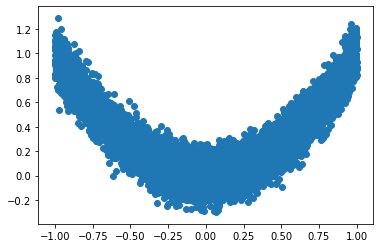

Train on 10001 samples
Epoch 1/10
10001/10001 [==============================] - 1s 53us/sample - loss: 0.1381
Epoch 2/10
10001/10001 [==============================] - 0s 30us/sample - loss: 0.1022
Epoch 3/10
10001/10001 [==============================] - 0s 32us/sample - loss: 0.0961
Epoch 4/10
10001/10001 [==============================] - 0s 29us/sample - loss: 0.0874
Epoch 5/10
10001/10001 [==============================] - 0s 30us/sample - loss: 0.0716
Epoch 6/10
10001/10001 [==============================] - 0s 32us/sample - loss: 0.0463
Epoch 7/10
10001/10001 [==============================] - 0s 29us/sample - loss: 0.0231
Epoch 8/10
10001/10001 [==============================] - 0s 30us/sample - loss: 0.0140
Epoch 9/10
10001/10001 [==============================] - 0s 29us/sample - loss: 0.0125
Epoch 10/10
10001/10001 [==============================] - 0s 22us/sample - loss: 0.0121
tf.Tensor(0.00997749250382185, shape=(), dtype=float64)


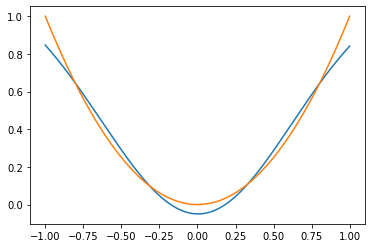

In [53]:
# inputs = keras.Input(shape = (1,), dtype ='float64')
# V1 = keras.layers.Dense(8, activation = 'tanh', dtype ='float64')
# # V2 = keras.layers.Dense(4, activation = 'tanh', dtype ='float64')
# V3 = keras.layers.Dense(1, dtype ='float64')
# outputs = V3(V1(inputs))
# test = keras.Model(inputs = inputs, outputs = outputs)
# test.summary()

x_train = np.linspace(-1,1,10001)
y_train = x_train**2 + np.random.normal(0,0.1,10001)
plt.scatter(x_train,y_train)
plt.show()
value_NN.compile(loss = 'mean_squared_error', optimizer='adam')
value_NN.fit(x=x_train,y=y_train, epochs=10, verbose = 1)
value_NN.evaluate(x_train,y_train)
print(keras.losses.MeanSquaredError()(x_train**2,y_train))
y = value_NN.predict(x_train)
plt.plot(x_train,y)
plt.plot(x_train,x_train**2)
plt.show()

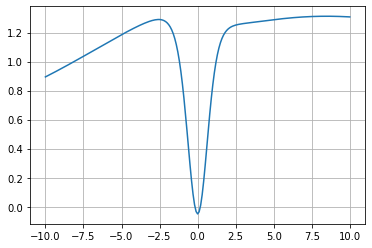

In [54]:
value_NN.compile(loss = 'mse')
xgrid = np.linspace(-10,10,201)
y = value_NN.predict(xgrid)
plt.plot(xgrid,y)
plt.grid()